# data assignment research question

TODO:

-   combine 2 categories
-   pivot using country categories
-   fix hist to make them more meaningful
-   make viz beautiful


## CCUS: Carbon capture, utilization and storage

Source: IEA (2024), [CCUS Projects Database](https://www.iea.org/data-and-statistics/data-product/ccus-projects-database)


The data we are concerned with is a list of around 900 CCUS projects around the world.


## Data cleaning


In [572]:
import numpy as np
import pandas as pd


df = pd.read_csv("data/ccus.csv")
df

,Project name,ID,Country,Partners,Project type,Announcement,FID,Operation,Suspension/decommissioning,Project Status,...,Ref 5,Ref 6,Ref 7,Link 1,Link 2,Link 3,Link 4,Link 5,Link 6,Link 7
0,3D DMX ArcelorMittal and IFPEN Dunkirk (full-s...,1,France,"ArcelorMittal, ifp, Axens, Uetikon, Grassco, b...",Capture,2019.0,NaN,2025.0,NaN,Planned,...,NaN,NaN,NaN,Link 1,Link 2,NaN,NaN,NaN,NaN,NaN
1,3D DMX ArcelorMittal and IFPEN Dunkirk 'REUZE',751,France,"ArcelorMittal, Engie, Infinium",CCU,2022.0,2024.0,2025.0,NaN,Planned,...,NaN,NaN,NaN,Link 1,Link 2,NaN,NaN,NaN,NaN,NaN
2,7 Blue Ammonia Facility,1055,Qatar,"QAFCO, thyssenkrupp Uhde/Consolidated Contract...",Full Chain,2022.0,2022.0,2026.0,NaN,Under construction,...,NaN,NaN,NaN,Link 1,Link 2,NaN,NaN,NaN,NaN,NaN
3,8Rivers H2 (8RH2) (WY),3,United States,"8Rivers, Wyoming Energy Authority",Capture,2022.0,NaN,NaN,NaN,Planned,...,NaN,NaN,NaN,Link 1,NaN,NaN,NaN,NaN,NaN,NaN
4,Abadi CCS/CCUS,227,Indonesia,"Inpex Masela 65%, Shell (trying to find a buye...",Full chain,2018.0,NaN,2027.0,NaN,Planned,...,NaN,NaN,NaN,Link 1,Link 2,Link 3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,Yara Pilbara ammonia,788,Australia,"Yara, JERA",Capture,2021.0,NaN,NaN,NaN,Planned,...,NaN,NaN,NaN,Link 1,NaN,NaN,NaN,NaN,NaN,NaN
840,Yara Sluiskil fertiliser,465,Netherlands,Yara,Capture,2022.0,2023.0,2026.0,NaN,Under construction,...,NaN,NaN,NaN,Link 1,Link 2,Link 3,NaN,NaN,NaN,NaN
841,Yara-BASF Gulf Coast,826,United States,"Yara, BASF",Capture,2023.0,NaN,2028.0,NaN,Planned,...,NaN,NaN,NaN,Link 1,NaN,NaN,NaN,NaN,NaN,NaN
842,ZerCal250,640,United Kingdom,"Origin, Singleton Birch",Capture,2021.0,NaN,NaN,NaN,Planned,...,NaN,NaN,NaN,Link 1,Link 2,NaN,NaN,NaN,NaN,NaN


In [573]:
df.columns

Index(['Project name', 'ID', 'Country', 'Partners', 'Project type',
       'Announcement', 'FID', 'Operation', 'Suspension/decommissioning',
       'Project Status', 'Project phase', 'Announced capacity (Mt CO2/yr)',
       'Estimated capacity by IEA (Mt CO2/yr)', 'Sector', 'Fate of carbon',
       'Part of CCUS hub', 'Region', 'Ref 1', 'Ref 2', 'Ref 3', 'Ref 4',
       'Ref 5', 'Ref 6', 'Ref 7', 'Link 1', 'Link 2', 'Link 3', 'Link 4',
       'Link 5', 'Link 6', 'Link 7'],
      dtype='object')

Drop columns which are not relevant for the analysis, such as the names of the companies.


In [574]:
df = df.drop(
    columns=[
        "Project name",
        "Partners",
        "Part of CCUS hub",
        "Ref 1",
        "Ref 2",
        "Ref 3",
        "Ref 4",
        "Ref 5",
        "Ref 6",
        "Ref 7",
        "Link 1",
        "Link 2",
        "Link 3",
        "Link 4",
        "Link 5",
        "Link 6",
        "Link 7",
    ]
)

df.head(1)

,ID,Country,Project type,Announcement,FID,Operation,Suspension/decommissioning,Project Status,Project phase,Announced capacity (Mt CO2/yr),Estimated capacity by IEA (Mt CO2/yr),Sector,Fate of carbon,Region
0,1,France,Capture,2019.0,NaN,2025.0,NaN,Planned,2.0,0.7,0.7,Iron and steel,Unknown/unspecified,Europe


Altering columns: Announced capacity (Mt CO2/yr)


`Announced capacity (Mt CO2/yr)` it the only column which is modified. This is necessary because there are 106 entries which have ranges instead of numbers. This makes it so the dtype of the column is wrong, which interrupts further analysis.


In [575]:
df = df.dropna(subset=["Announced capacity (Mt CO2/yr)"])

First, we drop the NaNs so that we can continue with the analysis. This might introduce some bias.


In [576]:
def range_size(value: str) -> float:
    if "-" not in value:
        return float(value)

    arr = value.split("-")
    a = float(arr[0].strip())
    b = float(arr[1].strip())
    return b - a


ranges = df["Announced capacity (Mt CO2/yr)"].apply(
    range_size
)

In [577]:
ranges.sort_values(ascending=False)

635    250.000
676    120.000
794     30.000
563     30.000
773     30.000
        ...   
662      0.001
784      0.001
522      0.000
414     -0.010
170     -5.000
Name: Announced capacity (Mt CO2/yr), Length: 614, dtype: float64

In [578]:
ranges.drop([635, 676]).describe()

count    612.000000
mean       2.479724
std        4.076815
min       -5.000000
25%        0.300000
50%        1.000000
75%        2.962500
max       30.000000
Name: Announced capacity (Mt CO2/yr), dtype: float64

First, we check the distribution of the ranges to see if taking their mean is representative. After removing the two outliers (`250` and `120`), the ranges have mean `3` with std `4`, with two outliers (`250` and `120`), we assume the substituting the range for the mean does not distort the data too much. This makes it much easier to do the analysis. This also sets indices 635 and 676 as outliers, which will be important later.


This code detects if the entry is a range, splits it, converts it into a number, gets the mean between the two extremes of the range, and returns it.


In [579]:
def range_cleanup(value: str) -> float:
    if "-" not in value:
        return float(value)

    arr = value.split("-")
    a = float(arr[0].strip())
    b = float(arr[1].strip())
    return (a + b) / 2


df = df.dropna(subset=["Announced capacity (Mt CO2/yr)"])

df["Announced capacity (Mt CO2/yr)"] = df["Announced capacity (Mt CO2/yr)"].apply(
    range_cleanup
)
df["Announced capacity (Mt CO2/yr)"].sample(5)

45     0.240
483    1.700
136    0.584
678    0.400
821    0.400
Name: Announced capacity (Mt CO2/yr), dtype: float64

This also makes it possible for us to add a new feature: the difference between the announced capacity and the estimated capacity.


In [580]:
df["Capacity error"] = (
    df["Announced capacity (Mt CO2/yr)"] - df["Estimated capacity by IEA (Mt CO2/yr)"]
)

df["Capacity error"].describe()

count    614.000000
mean      -0.068950
std        0.749446
min      -10.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        5.000000
Name: Capacity error, dtype: float64

Given the mean and std, we should assume that, for the most part, the difference between estimated and announced capacity is not that relevant.


### Altering columns: Project Type


In [581]:
df['Project type'].value_counts()

Project type
Capture       238
Full chain    114
T&S            82
Storage        74
Transport      56
CCU            44
Full Chain      6
Name: count, dtype: int64

In [582]:
def fix_full_chain(value: str) -> str:
    if 'Full chain' in value:
        return 'Full Chain'
    else:
        return value
    
df['Project type'] = df['Project type'].apply(fix_full_chain)
df['Project type'].value_counts()

Project type
Capture       238
Full Chain    120
T&S            82
Storage        74
Transport      56
CCU            44
Name: count, dtype: int64

In this part, we fix the 'Full Chain'/'Full chain' capitalization issue.


### Altering columns: Region


In [583]:
df['Region'].value_counts()

Region
Europe                                            259
North America                                     254
Other Asia Pacific                                 52
Australia and New Zealand                          23
Middle East                                        14
Africa                                              4
Central and South America                           4
Unknown                                             3
Other Asia Pacific - Australia and New Zealand      1
Name: count, dtype: int64

We leave the one `Other Asia Pacific - Australia and New Zealand`


### Altering columns: Country


In [584]:
df['Country'].value_counts()

Country
United States                                      211
United Kingdom                                      70
Canada                                              43
Norway                                              32
People's Republic of China                          28
France                                              22
Netherlands                                         20
Germany                                             20
Denmark                                             19
Australia                                           19
Sweden                                              13
Belgium                                              8
Iceland                                              8
Greece                                               8
United Arab Emirates                                 7
Indonesia                                            7
Japan                                                6
Finland                                              5
It

While there are some mixed country projects (`Australia-Japan`), they are not that many as to affect the analysis


### Convert appropriate columns to category dtype


These columns were selected by going through each of the columns with the `value_counts()` method to see if they had categorical data. This correct labelling makes some analyses possible. Although not particularly relevant in this case, we also see a ~4x reduction in memory usage.


In [585]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 840
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     614 non-null    int64  
 1   Country                                614 non-null    object 
 2   Project type                           614 non-null    object 
 3   Announcement                           597 non-null    float64
 4   FID                                    224 non-null    float64
 5   Operation                              459 non-null    float64
 6   Suspension/decommissioning             6 non-null      float64
 7   Project Status                         614 non-null    object 
 8   Project phase                          163 non-null    float64
 9   Announced capacity (Mt CO2/yr)         614 non-null    float64
 10  Estimated capacity by IEA (Mt CO2/yr)  614 non-null    float64
 11  Sector     

In [586]:
category_cols = [
    "Country",
    "Project type",
    "Project Status",
    "Project phase",
    "Sector",
    "Fate of carbon",
    "Region",
]

df[category_cols] = df[category_cols].astype("category")

In [587]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 840
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   ID                                     614 non-null    int64   
 1   Country                                614 non-null    category
 2   Project type                           614 non-null    category
 3   Announcement                           597 non-null    float64 
 4   FID                                    224 non-null    float64 
 5   Operation                              459 non-null    float64 
 6   Suspension/decommissioning             6 non-null      float64 
 7   Project Status                         614 non-null    category
 8   Project phase                          163 non-null    category
 9   Announced capacity (Mt CO2/yr)         614 non-null    float64 
 10  Estimated capacity by IEA (Mt CO2/yr)  614 non-null    float64 
 11

### Missing data


In [588]:
df.isna().sum().sort_values(ascending=False)

Suspension/decommissioning               608
Project phase                            451
FID                                      390
Operation                                155
Announcement                              17
ID                                         0
Project type                               0
Country                                    0
Project Status                             0
Announced capacity (Mt CO2/yr)             0
Estimated capacity by IEA (Mt CO2/yr)      0
Sector                                     0
Fate of carbon                             0
Region                                     0
Capacity error                             0
dtype: int64

Since these columns have a lot of missing values, they are dropped as well. We also drop the rows which have nans in `announcement`, which are only 20, or around 2% of the original sample.


In [589]:
df = df.drop(
    columns=[
        "Suspension/decommissioning",
        "Project phase",
        "FID",
        "Operation",
    ]
)

In [590]:
df = df.dropna(subset=["Announcement"])

In [591]:
df.isna().sum().sort_values(ascending=False)

ID                                       0
Country                                  0
Project type                             0
Announcement                             0
Project Status                           0
Announced capacity (Mt CO2/yr)           0
Estimated capacity by IEA (Mt CO2/yr)    0
Sector                                   0
Fate of carbon                           0
Region                                   0
Capacity error                           0
dtype: int64

## Descriptive Statistics


In [592]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 597 entries, 0 to 840
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   ID                                     597 non-null    int64   
 1   Country                                597 non-null    category
 2   Project type                           597 non-null    category
 3   Announcement                           597 non-null    float64 
 4   Project Status                         597 non-null    category
 5   Announced capacity (Mt CO2/yr)         597 non-null    float64 
 6   Estimated capacity by IEA (Mt CO2/yr)  597 non-null    float64 
 7   Sector                                 597 non-null    category
 8   Fate of carbon                         597 non-null    category
 9   Region                                 597 non-null    category
 10  Capacity error                         597 non-null    float64 
dty

### Categorical variables


-   Region
-   Country
-   Fate of carbon
-   Sector
-   Project type
-   Project status


<Axes: title={'center': '# of CCUS Projects by Region'}, ylabel='Region'>

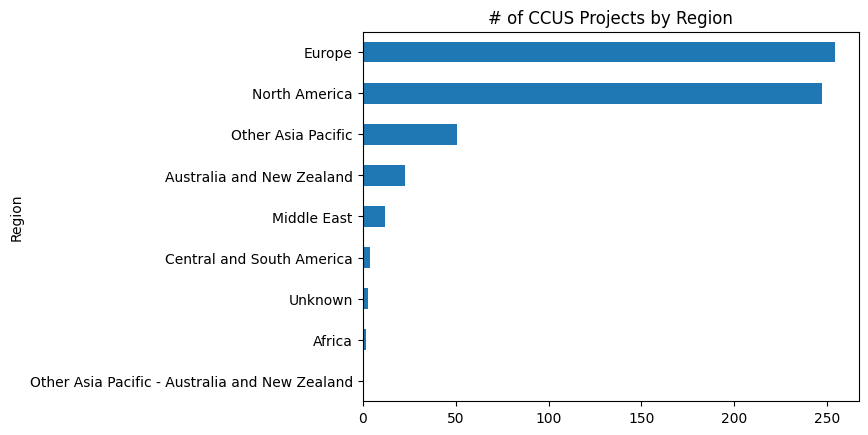

In [593]:
df["Region"].value_counts().sort_values(ascending=True).plot.barh(title="# of CCUS Projects by Region")

In [594]:
df_rows_count = df.shape[0]
europe_counts = (df['Region'] == 'Europe').sum()
na_counts = (df['Region'] == 'North America').sum()
region_percentage = (europe_counts + na_counts) / df_rows_count 
print(f"Europe and North America account for {region_percentage * 100:.2f}% of total entries")

Europe and North America account for 83.92% of total entries


<Axes: ylabel='Country'>

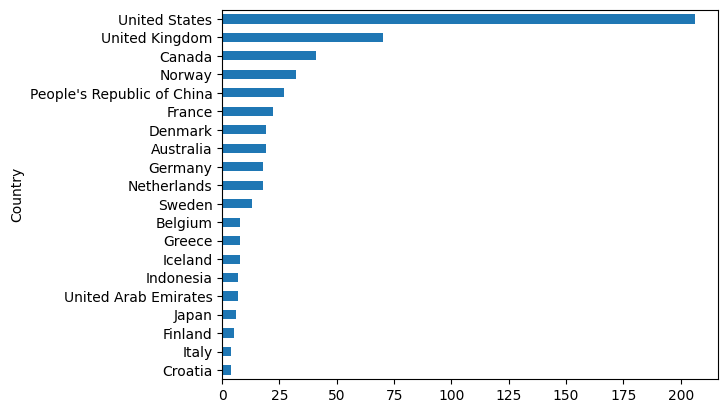

In [595]:
df["Country"].value_counts().sort_values(ascending=True).tail(20).plot.barh()

In [596]:
df_rows_count = df.shape[0]
us_counts = (df['Country'] == 'United States').sum()
country_percentage = us_counts / df_rows_count 
print(f"US accounts for {country_percentage * 100:.2f}% of total entries")

US accounts for 34.51% of total entries


<Axes: ylabel='Project type'>

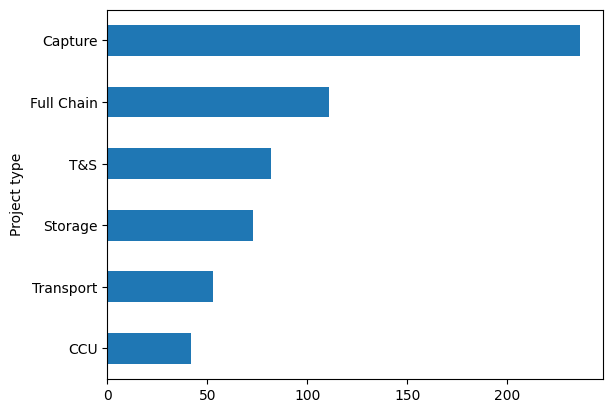

In [597]:
df["Project type"].value_counts().sort_values().plot.barh()

In [598]:
df_rows_count = df.shape[0]
capture_counts = (df['Project type'] == 'Capture').sum()
type_percentage = capture_counts / df_rows_count 
print(f"Capture projects account for {type_percentage * 100:.2f}% of total entries")

Capture projects account for 39.53% of total entries


<Axes: ylabel='Project Status'>

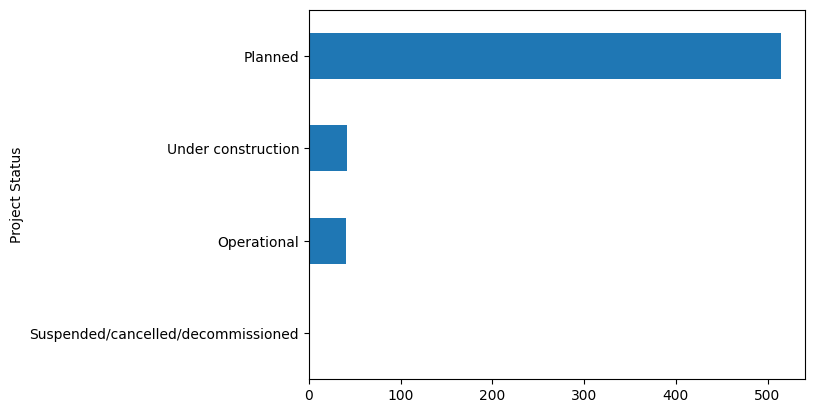

In [599]:
df["Project Status"].value_counts().sort_values().plot.barh()

In [600]:
df_rows_count = df.shape[0]
planned_counts = (df['Project Status'] == 'Planned').sum()
status_percentage = planned_counts / df_rows_count 
print(f"Planned status accounts for {status_percentage * 100:.2f}% of total entries")

Planned status accounts for 86.26% of total entries


In [601]:
df_rows_count = df.shape[0]
op_counts = (df['Project Status'] == 'Operational').sum()
status_percentage = op_counts / df_rows_count 
print(f"Operational status accounts for {status_percentage * 100:.2f}% of total entries")

Operational status accounts for 6.70% of total entries


<Axes: ylabel='Sector'>

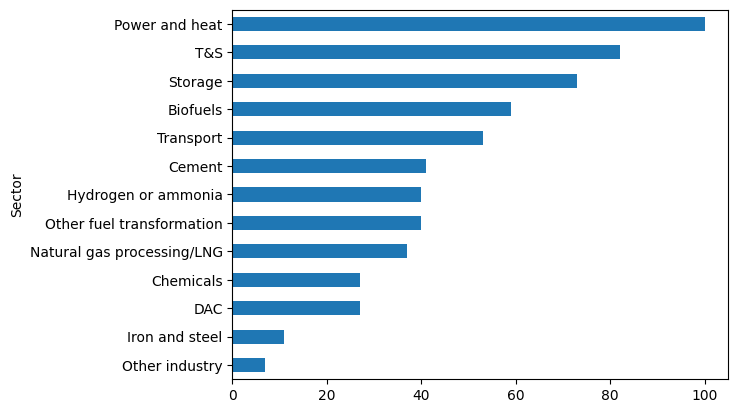

In [602]:
df["Sector"].value_counts().sort_values(ascending=True).plot.barh()

<Axes: xlabel='Fate of carbon'>

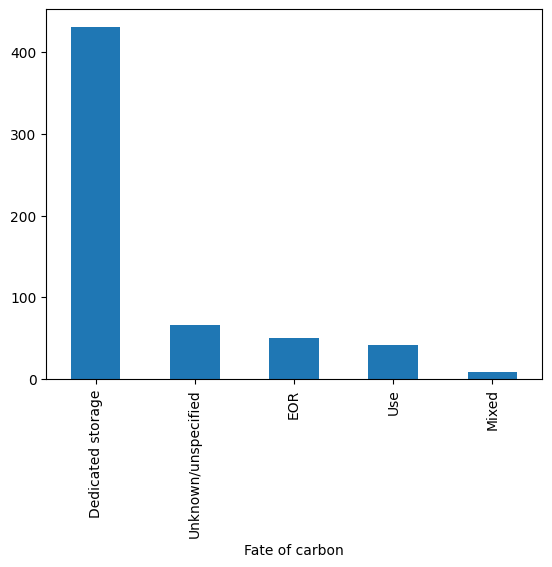

In [603]:
df["Fate of carbon"].value_counts().plot.bar()

In [604]:
df_rows_count = df.shape[0]
fate_counts = (df['Fate of carbon'] == 'Dedicated storage').sum()
status_percentage = fate_counts / df_rows_count 
print(f"Storage accounts for {status_percentage * 100:.2f}% of total entries")

Storage accounts for 72.19% of total entries


### Insights

With these simple visualizations, we can gather a few insights from the data:

-   extrene majority are just plans
-   extrene majority are in the US, although when separated by region Europe is equivalent to the US
-   extrene majority intend for their carbon to go into dedicated storage
-   most of them are about capture (and not transporting, storing, or using carbon)

We have then the median picture of a CCUS project: a company in Europe or the US that has plans to capture for somebody else to store it.

There should be space, then, for companies to invest in areas other than capture, and to use all the carbon that will be available for storage.

This makes sense considering the US's plan to become an environmental powerhouse (), but it is noticeable that Chinese companies don't seem to want to compete on this front.


### Numerical parameters


-   Announcement
-   Announced capacity (Mt CO2/yr)
-   Estimated capacity by IEA (Mt CO2/yr)
-   Capacity error


In [605]:
numerical_features = [
    "Announcement",
    "Announced capacity (Mt CO2/yr)",
    "Estimated capacity by IEA (Mt CO2/yr)",
    "Capacity error"
    ]

<Axes: >

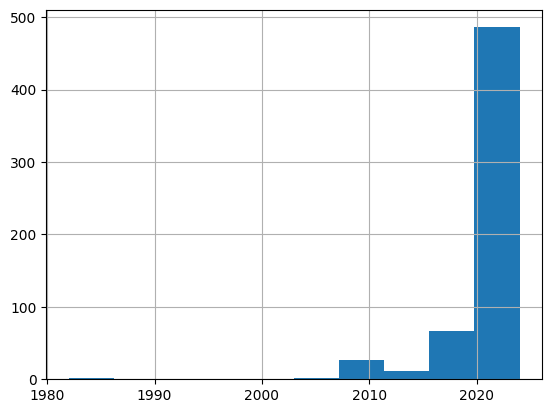

In [606]:
df["Announcement"].hist()

In [607]:
df['Announcement'].value_counts()

Announcement
2021.0    155
2022.0    148
2023.0    130
2020.0     46
2019.0     31
2018.0     20
2011.0     10
2016.0      9
2024.0      7
2017.0      7
2009.0      7
2010.0      6
2013.0      5
2012.0      3
2008.0      3
2015.0      2
2007.0      1
2006.0      1
1997.0      1
1982.0      1
2014.0      1
1984.0      1
1991.0      1
2002.0      1
Name: count, dtype: int64

In [608]:
year_p = (155 + 148 + 130) / df.shape[0]
print(f"{year_p * 100:.2f}% of projects announced in 2021-2023")

72.53% of projects announced in 2021-2023


<Axes: >

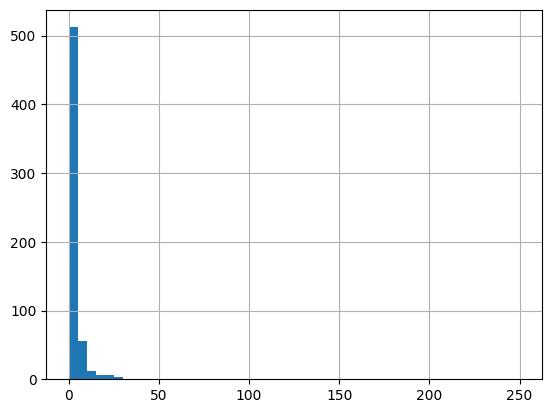

In [609]:
df["Announced capacity (Mt CO2/yr)"].hist(bins=50)

<Axes: >

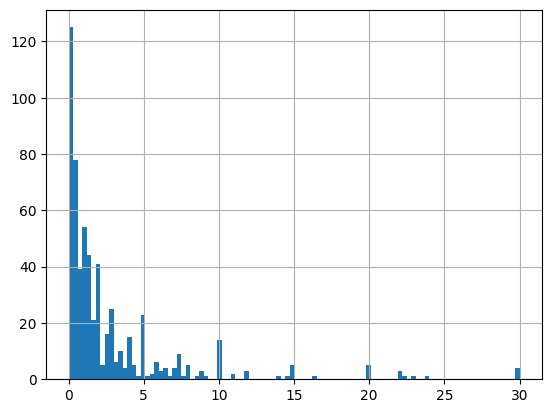

In [610]:
df["Announced capacity (Mt CO2/yr)"].drop([635,676]).hist(bins=100)

<Axes: >

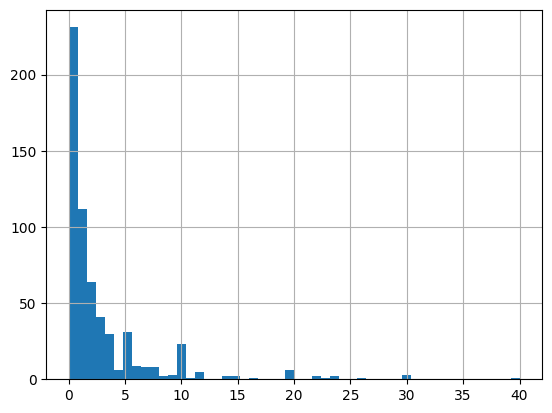

In [611]:
df["Estimated capacity by IEA (Mt CO2/yr)"].drop([635,676]).hist(bins=50)

In [612]:
df["Estimated capacity by IEA (Mt CO2/yr)"].sort_values()

28       0.001
784      0.001
662      0.001
692      0.002
191      0.004
        ...   
794     30.000
773     30.000
319     40.000
676    120.000
635    250.000
Name: Estimated capacity by IEA (Mt CO2/yr), Length: 597, dtype: float64

<Axes: >

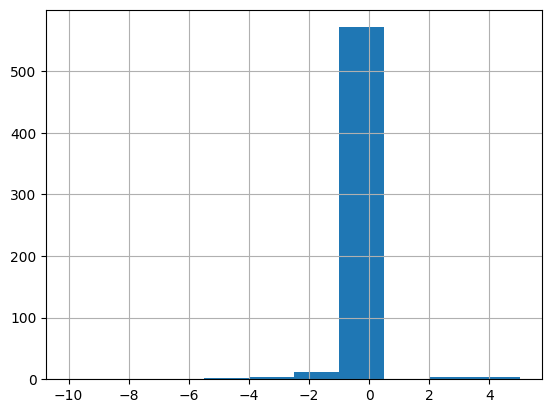

In [613]:
df["Capacity error"].hist(bins=10)

### Outliers


#todo get back the whole dataset for this


In [614]:
df[df['Region'] == 'Africa']

,ID,Country,Project type,Announcement,Project Status,Announced capacity (Mt CO2/yr),Estimated capacity by IEA (Mt CO2/yr),Sector,Fate of carbon,Region,Capacity error
359,838,Kenya,Full Chain,2023.0,Planned,1.0,1.0,DAC,Dedicated storage,Africa,0.0
749,622,Lybia,Full Chain,2023.0,Planned,1.6,1.6,Natural gas processing/LNG,Dedicated storage,Africa,0.0


In [615]:
df[df['Announced capacity (Mt CO2/yr)'] > 100]

,ID,Country,Project type,Announcement,Project Status,Announced capacity (Mt CO2/yr),Estimated capacity by IEA (Mt CO2/yr),Sector,Fate of carbon,Region,Capacity error
635,799,United States,Transport,2023.0,Planned,250.0,250.0,Transport,Unknown/unspecified,North America,0.0
676,798,United States,Transport,2023.0,Planned,120.0,120.0,Transport,Unknown/unspecified,North America,0.0


In [616]:
df[df['Announcement'] < 2000]

,ID,Country,Project type,Announcement,Project Status,Announced capacity (Mt CO2/yr),Estimated capacity by IEA (Mt CO2/yr),Sector,Fate of carbon,Region,Capacity error
294,144,United States,Full Chain,1982.0,Operational,0.68,0.68,Chemicals,EOR,North America,0.0
360,176,United States,Full Chain,1997.0,Operational,3.00,3.00,Other fuel transformation,EOR,North America,0.0
476,252,United States,Full Chain,1984.0,Operational,3.50,3.50,Natural gas processing/LNG,EOR,North America,0.0
735,374,Norway,Full Chain,1991.0,Operational,1.00,1.00,Natural gas processing/LNG,Dedicated storage,Europe,0.0


## Insights


The data continues being homogenous: more than 500 out of 600 projects were announced after 2020, are small scale, and do not diverge from the estimate. Given the kind of data this is, it might be interesting to investigate what makes the outliers special. Either by their scale (`676`, `635`) or their country of origin (`359`, `749`) or date of announcement (294, 360, 476, 735).

By knowing the state of the field that is being planned, we can better know how to make a company that is not one among hundreds of others doing the same thing and instead fit within a niche


## By plans


In [617]:
# numerical_features = [
#     "Announcement",
#     "Announced capacity (Mt CO2/yr)",
#     ]

# for item in numerical_features:
#     df[item].hist(bins=50, by=df["Project Status"], layout=(1,4), figsize=(16,4))

In [622]:
df[['Announcement', 'Project Status']].groupby('Project Status').describe()

/tmp/ipykernel_38544/1008083136.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[['Announcement', 'Project Status']].groupby('Project Status').describe()


Announcement                         \
                                          count         mean       std   
Project Status                                                           
Operational                                40.0  2010.400000  9.071793   
Planned                                   515.0  2021.196117  2.115899   
Suspended/cancelled/decommissioned          1.0  2009.000000       NaN   
Under construction                         41.0  2020.268293  2.738835   

                                                                             
                                       min      25%     50%     75%     max  
Project Status                                                               
Operational                         1982.0  2008.75  2011.0  2016.0  2022.0  
Planned                             2009.0  2021.00  2022.0  2023.0  2024.0  
Suspended/cancelled/decommissioned  2009.0  2009.00  2009.0  2009.0  2009.0  
Under construction                  2010.0  2019.00  2021.0  2022.0  2023.0

In [623]:
df[["Announced capacity (Mt CO2/yr)", 'Project Status']].groupby('Project Status').describe()

/tmp/ipykernel_38544/825036085.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[["Announced capacity (Mt CO2/yr)", 'Project Status']].groupby('Project Status').describe()


Announced capacity (Mt CO2/yr)            \
                                                            count      mean   
Project Status                                                                
Operational                                                  40.0  1.445125   
Planned                                                     515.0  3.760035   
Suspended/cancelled/decommissioned                            1.0  0.330000   
Under construction                                           41.0  1.462098   

                                                                          \
                                          std    min    25%   50%    75%   
Project Status                                                             
Operational                          2.583354  0.001  0.195  0.75  1.150   
Planned                             12.906735  0.001  0.440  1.42  3.575   
Suspended/cancelled/decommissioned        NaN  0.330  0.330  0.33  0.330   
Under construction                   1.976315  0.001  0.300  0.75  1.700   

                                            
                                       max  
Project Status                              
Operational                          14.60  
Planned                             250.00  
Suspended/cancelled/decommissioned    0.33  
Under construction                   10.00

In [631]:
df[df['Project Status'] == 'Planned']['Announced capacity (Mt CO2/yr)'].drop([635,676]).describe()

count    513.000000
mean       3.053446
std        4.681685
min        0.001000
25%        0.440000
50%        1.400000
75%        3.500000
max       30.000000
Name: Announced capacity (Mt CO2/yr), dtype: float64

-   Operational: mean 1.4 and std 2.5
-   Planned: mean 3.0 and std 4.6

Sounds like the projects will, on average, double their capacity to capture carbon.

We might want to do some categories though.


### Hypothesis testing

?


## Conclusion


This project showcases data cleaning, feature engineering and descriptive statistics.
